<a href="https://colab.research.google.com/github/FrydaOviedo/Fisica_Computacional/blob/main/Evaluacion3/Evaluacion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Bibliotecas a utilizar:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Problema 1:

True


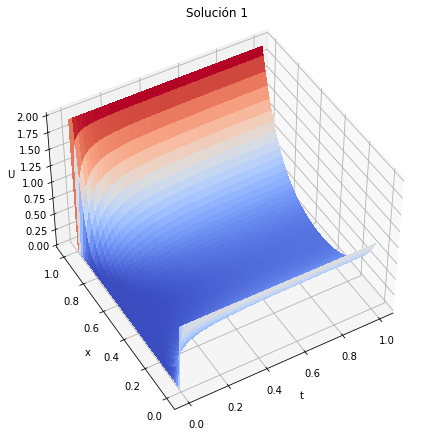

In [ ]:
#Backward method to solve 1D reaction-diffusion equation:
    #u_t = D * u_xx + alpha * u
    
#with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
#and initial condition u(x,0) = 4*x - 4*x**2

M = 100 # GRID POINTS on space interval
N = 200 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 1

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 0.1  # Diffusion coefficient
alpha = -3 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0.0

#----- Dirichlet boundary conditions -----
U[0,:] = 1.0 
U[-1,:] = 2.0

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure( figsize=(12,6))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)


ax.set_title("Solución 1")
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
plt.tight_layout()
ax.view_init( elev = 45, azim= -120)
plt.show()

Problema 2:

True


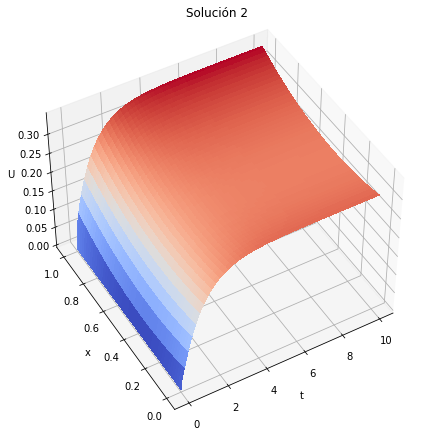

In [ ]:
#Backward method to solve 1D reaction-diffusion equation:
   #u_t = D * u_xx + alpha * u
    
#with Neumann boundary conditions 
#at x=0: u_x = sin(pi/2)
#at x=L: u_x = sin(3*pi/4) with L=1
#and initial condition u(x,0) = 4*x - 4*x**2

M = 100 # GRID POINTS on space interval
N = 300 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 10

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha
p = 1 + 2*r - s

#Creación de la malla
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = p*np.ones( (1, M) )
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0.0

#----- Neumann boundary conditions -----
#leftBC = np.arange(1, N+1)
f =0.1*np.ones( [ N+1,1])

#rightBC = np.arange(1, N+1)
g = 0.2*np.ones( [N+1,1] )


for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b, 1, c)
    b2 = np.array(U[0:M, k-1])
    B = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,B)  # Solve x=A\b

# ----- Checks if the solution is correct:
gc = np.allclose(np.dot(A,U[0:M,N-1]), B)
print(gc)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize = (12,6))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)
ax.set_title("Solución 2")
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
plt.tight_layout()
ax.view_init( elev = 45, azim = -120)
plt.show()

Problema 3:

True


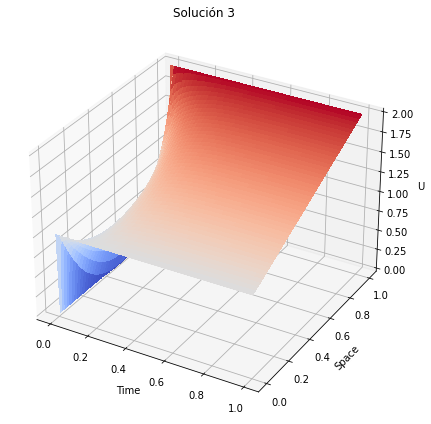

In [ ]:
#Backward method to solve 1D reaction-diffusion equation:
    #u_t = D * u_xx + alpha * u
    
#with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
#and initial condition u(x,0) = 4*x - 4*x**2



M = 100 # GRID POINTS on space interval
N = 300 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 1

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = 0 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0.0

#----- Dirichlet boundary conditions -----
U[0,:] = 1.0 
U[-1,:] = 2.0

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    B = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,B)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), B)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(12, 6))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)


ax.set_title("Solución 3")
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()

plt.show()